# `Aula 1`

In [1]:
import pandas as pd

In [2]:
# Importando database
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'

df = pd.read_csv(
    url,
    sep=','
)
df

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


In [3]:
# Visualizando primeiras 7 linhas do dataframe
df.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [4]:
# Visualizando 5 últimas linhas do dataframa
df.tail()

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


In [5]:
# Verificando a quantidade de linhas e colunas do dataframe
df.shape

(18, 4)

In [6]:
# Verificando o nome das colunas que há no dataframe
df.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [7]:
# Verificando tipo de dados de cada uma dessas colunas
df.dtypes

Nome         object
Idade         int64
Notas       float64
Aprovado       bool
dtype: object

In [8]:
# Verificando apenas coluna 'Nome'
df['Nome']

0           Ary
1           Ana
2         Cátia
3         Denis
4          Beto
5         Bruna
6          Dara
7        Carlos
8         Alice
9         Vitor
10       Daniel
11         Igor
12    Sthefanie
13        Mirla
14        Paulo
15       Mylena
16        Lucas
17        Nadia
Name: Nome, dtype: object

In [9]:
# Obsevando colunas 'Nome' e 'Aprovado'
df[['Nome', 'Aprovado']]

,Nome,Aprovado
0,Ary,True
1,Ana,False
2,Cátia,False
3,Denis,False
4,Beto,True
5,Bruna,False
6,Dara,True
7,Carlos,True
8,Alice,False
9,Vitor,False


In [10]:
# Calculando média, desvio padrão, etc
df.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


# `Aula 2`

In [11]:
# Calculando média de nota por idade
nota_idade = df.groupby('Idade')['Notas'].mean()

# Transformando Serie em DataFrame
df_nota_idade = nota_idade.to_frame()

# Renomeando colunas notas para Média Notas
df_nota_idade.columns = ['Media Notas']

# Ajustando index
df_nota_idade.reset_index()

,Idade,Media Notas
0,18,5.0
1,19,6.0
2,20,7.5
3,21,8.5
4,23,NaN
5,24,4.5
6,25,9.0
7,26,9.5
8,27,2.5
9,28,NaN


In [12]:
# Verificando idade únicas
df['Idade'].unique()

# Verificando quantas vezes cada idade se repete
df['Idade'].value_counts().to_frame()


,count
Idade,
21,3
18,2
20,1
27,1
23,1
19,1
35,1
28,1
24,1


<Axes: xlabel='Idade'>

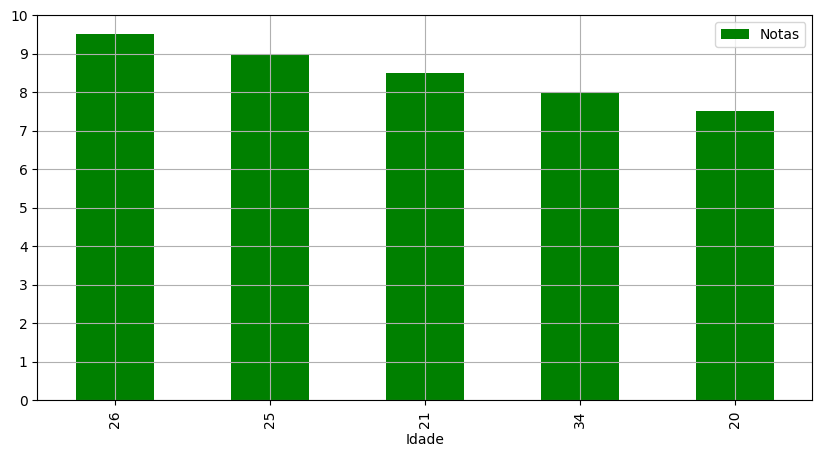

In [13]:
# Idades que possuem média de notas mais elevadas
df_notas_idades = df.groupby('Idade')[['Notas']].mean().sort_values('Notas', ascending=False)

# Top 5 maiores médias de notas por idade
df_notas_idades = df_notas_idades.head()

# Gráfico representando a informação anterior
df_notas_idades.plot(
    kind='bar', 
    figsize=(10, 5), 
    color='green',
    yticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    grid=True
)

# `Aula 3`

In [14]:
df_filter_idades_notas = df[
    (df['Idade'] <= 30) 
    & 
    (df['Notas'] > 6)
]
print(df_filter_idades_notas)


         Nome  Idade  Notas  Aprovado
0         Ary     20    7.5      True
4        Beto     21   10.0      True
6        Dara     21    7.0      True
12  Sthefanie     26    9.5      True
13      Mirla     25    9.0      True
15     Mylena     29    7.0      True


1. Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

In [15]:
from IPython.display import display

# DataFrame sem tratamento
display(df)

# Tratando nulos
df.dropna(
    axis=0,
    inplace=True,
    ignore_index=True
)

# DataFrame com tratamento
display(df)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Cátia,27,2.5,False
2,Denis,18,5.0,False
3,Beto,21,10.0,True
4,Dara,21,7.0,True
5,Carlos,19,6.0,True
6,Alice,35,5.6,False
7,Igor,24,4.5,False
8,Sthefanie,26,9.5,True
9,Mirla,25,9.0,True


2) Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

In [16]:
df_filter_carlos_alice = df[
    (df['Nome'] != 'Carlos')
    &
    (df['Nome'] != 'Alice')
]

df_filter_carlos_alice

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Cátia,27,2.5,False
2,Denis,18,5.0,False
3,Beto,21,10.0,True
4,Dara,21,7.0,True
7,Igor,24,4.5,False
8,Sthefanie,26,9.5,True
9,Mirla,25,9.0,True
10,Mylena,29,7.0,True
11,Nadia,34,8.0,True


3. Aplique um filtro que selecione apenas os alunos que foram aprovados.



In [17]:
df_filter_aprovados = df[
    (df['Aprovado'] == True)
]

df_filter_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
3,Beto,21,10.0,True
4,Dara,21,7.0,True
5,Carlos,19,6.0,True
8,Sthefanie,26,9.5,True
9,Mirla,25,9.0,True
10,Mylena,29,7.0,True
11,Nadia,34,8.0,True


4. Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".


In [18]:
df_filter_aprovados.to_csv(
    "alunos_aprovados.csv",
    index=False
)

5. Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade, tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0.

In [19]:
df_ajuste = df.replace(
    to_replace=7.0,
    value=8.0
)
df_ajuste

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Cátia,27,2.5,False
2,Denis,18,5.0,False
3,Beto,21,10.0,True
4,Dara,21,8.0,True
5,Carlos,19,6.0,True
6,Alice,35,5.6,False
7,Igor,24,4.5,False
8,Sthefanie,26,9.5,True
9,Mirla,25,9.0,True


# `Aula 4`

1) Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.


In [23]:
df['pontos_extras'] = df['Notas'] * 0.4
df

,Nome,Idade,Notas,Aprovado,pontos_extras
0,Ary,20,7.5,True,3.00
1,Cátia,27,2.5,False,1.00
2,Denis,18,5.0,False,2.00
3,Beto,21,10.0,True,4.00
4,Dara,21,7.0,True,2.80
5,Carlos,19,6.0,True,2.40
6,Alice,35,5.6,False,2.24
7,Igor,24,4.5,False,1.80
8,Sthefanie,26,9.5,True,3.80
9,Mirla,25,9.0,True,3.60


2) Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

In [24]:
df['notas_finais'] = df['Notas'] + df['pontos_extras']
df

,Nome,Idade,Notas,Aprovado,pontos_extras,notas_finais
0,Ary,20,7.5,True,3.00,10.50
1,Cátia,27,2.5,False,1.00,3.50
2,Denis,18,5.0,False,2.00,7.00
3,Beto,21,10.0,True,4.00,14.00
4,Dara,21,7.0,True,2.80,9.80
5,Carlos,19,6.0,True,2.40,8.40
6,Alice,35,5.6,False,2.24,7.84
7,Igor,24,4.5,False,1.80,6.30
8,Sthefanie,26,9.5,True,3.80,13.30
9,Mirla,25,9.0,True,3.60,12.60


3) Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).

In [25]:
def aprovado_final(value):
    if value >= 6:
        return True
    else:
        return False

df['aprovado_final'] = df['notas_finais'].apply(aprovado_final)
df

,Nome,Idade,Notas,Aprovado,pontos_extras,notas_finais,aprovado_final
0,Ary,20,7.5,True,3.00,10.50,True
1,Cátia,27,2.5,False,1.00,3.50,False
2,Denis,18,5.0,False,2.00,7.00,True
3,Beto,21,10.0,True,4.00,14.00,True
4,Dara,21,7.0,True,2.80,9.80,True
5,Carlos,19,6.0,True,2.40,8.40,True
6,Alice,35,5.6,False,2.24,7.84,True
7,Igor,24,4.5,False,1.80,6.30,True
8,Sthefanie,26,9.5,True,3.80,13.30,True
9,Mirla,25,9.0,True,3.60,12.60,True


4) Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [30]:
aprovado_pontos_extras = df[
    (df['Aprovado'] == False) 
    & 
    (df['aprovado_final'] == True)
]
aprovado_pontos_extras

,Nome,Idade,Notas,Aprovado,pontos_extras,notas_finais,aprovado_final
2,Denis,18,5.0,False,2.00,7.00,True
6,Alice,35,5.6,False,2.24,7.84,True
7,Igor,24,4.5,False,1.80,6.30,True
